<a href="https://colab.research.google.com/github/wesengp/Seletivo/blob/master/Desafio_Bazico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Passo 1 - Importar os Dados
Passo 2 - Visualizar e tratar a Base de Dados
Passo 3 -  "Dar uma olhada" Na base de Dados (Panorama)
Passo 4 - Construir uma análise
Passo 4.1 - Ver quais clientes São mais provaveis de comprar
passo 5 - Listar os clientes (100 tops clientes) 
passo 6 - fazer a parte do aprendizado de máquina para gerar o modelo



In [194]:
import pandas as pd 
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import ttest_ind



# Importe os dados da base 

In [126]:
tabela_vendas_produtos = pd.read_csv('/content/drive/MyDrive/Desafio Bazico/vendas_de_produtos.csv') 


In [127]:
tabela_clientes = pd.read_csv('/content/drive/MyDrive/Desafio Bazico/clientes.csv') 

#Fiz uma pré analise na base para ver se o import estava correto

In [129]:
display(tabela_vendas_produtos.head())

,ID_Cliente,Data,ID_Produto,Descrição_Produto,Quantidade,Preço_Unitário,ID_Pedido,Desconto,Frete,Total_do_Pedido
0,1.242908e+10,2021-05-27,14.0,Bázica Gola C - Air - Azul Marinho - M,1,109.0,1000000401,0.0,4.9,113.9
1,1.279362e+10,2021-05-27,NaN,Bázica Gola C - Powerful - Preto - P,1,109.0,1000000400,0.0,4.9,113.9
2,1.000000e+00,2021-05-27,NaN,Bázica Gola C - Powerful - Preto - M,1,109.0,1000000399,0.0,4.9,113.9
3,2.000000e+00,2021-05-26,NaN,Bázica Gola C - Powerful - Preto - M,2,109.0,1000000398,0.0,4.9,301.9
4,2.000000e+00,2021-05-26,NaN,Bázica Gola C - Powerful - Branco - M,1,109.0,1000000398,0.0,4.9,301.9


# Essa etapa foi para identificar os valores da base bem como limpar as partes vazias e partir para a analise mais detalhada

In [12]:
tabela_vendas_produtos = tabela_vendas_produtos.dropna() 
display(tabela_vendas_produtos.info()) 
display(tabela_vendas_produtos.describe().round(3)) 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16760 entries, 0 to 17027
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID_Cliente         16760 non-null  float64
 1   Data               16760 non-null  object 
 2   Descrição_Produto  16760 non-null  object 
 3   Quantidade         16760 non-null  int64  
 4   Preço_Unitário     16760 non-null  float64
 5   Desconto           16760 non-null  float64
 6   Frete              16760 non-null  float64
 7   Total_do_Pedido    16760 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 1.2+ MB


None

,ID_Cliente,Quantidade,Preço_Unitário,Desconto,Frete,Total_do_Pedido
count,1.676000e+04,16760.000,16760.000,16760.000,16760.000,16760.000
mean,1.522543e+10,1.066,125.964,51.151,1.483,316.461
std,1.416565e+09,1.028,31.241,70.987,6.601,618.034
min,1.000000e+00,1.000,0.000,0.000,0.000,0.000
25%,1.530185e+10,1.000,119.000,0.000,0.000,166.600
50%,1.571775e+10,1.000,119.000,30.000,0.000,238.010
75%,1.585688e+10,1.000,119.000,95.200,0.000,357.000
max,1.599067e+10,84.000,321.000,952.000,185.780,23781.600


## Essa foi uma etapa de verificação fiz um script para ver se os clientes compraram em datas diferentes e quais foram essas datas, com intuito de verificar a recorrencia das compras de cada um deles, essa informação serviu apenas como base para ter uma ideia de como estruturar o modelo

In [ ]:
# Impreção das datas de todas as compras de cada cliente
for cliente_id, compras in datas_por_cliente.items():
    print(f"Compras do cliente {cliente_id}:")
    for data_compra, pedido_id in compras:
        print(f"- Data da compra: {data_compra}, ID do pedido: {pedido_id}")
    # Verificar se o cliente comprou em datas diferentes
    compras_datas = set([str(data) for data, _ in compras])
    if len(compras_datas) > 1:
        print(f"O cliente {cliente_id} comprou em datas diferentes.")


## Aqui foi executado os filtros dos dados das duas ultimas semanas e logo em seguida agrupei os dados do id e a soma total dos pedidos para cada cliente, depois os resultados foram postos em ordem decrescente e por fim selecionei os possiveis 100 primeiros clientes da lista


In [18]:
# Converte a coluna de data para o formato datetime
tabela_vendas_produtos['Data'] = pd.to_datetime(tabela_vendas_produtos['Data'])


In [19]:
# Filtra os dados para as últimas duas semanas
ultimas_duas_semanas = tabela_vendas_produtos['Data'] >= (tabela_vendas_produtos['Data'].max() - dt.timedelta(days=14))
df_periodo = tabela_vendas_produtos[ultimas_duas_semanas]

In [20]:
# Agrupa os dados por ID_Cliente e calcula a soma do Total_do_Pedido para cada cliente
clientes = df_periodo.groupby('ID_Cliente').sum()['Total_do_Pedido']

<ipython-input-20-182a9238dc40>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  clientes = df_periodo.groupby('ID_Cliente').sum()['Total_do_Pedido']


In [21]:
# Ordena os resultados em ordem decrescente com base no valor total do pedido
clientes_ordenados = clientes.sort_values(ascending=False)


In [22]:
# Seleciona os 100 primeiros clientes da lista classificada
top_100_clientes = clientes_ordenados.head(100)

In [23]:
print(top_100_clientes)

ID_Cliente
1.591419e+10    237816.00
1.598193e+10     15919.00
1.598494e+10     10362.00
1.598429e+10      9639.00
1.574424e+10      8454.00
                  ...    
1.598488e+10      1675.52
1.599027e+10      1675.52
1.598409e+10      1675.52
1.598614e+10      1675.52
1.503154e+10      1624.00
Name: Total_do_Pedido, Length: 100, dtype: float64


## Aqui inicia o modelo  de floresta aleatória (Random Forest) é um conjunto de árvores de decisão que são treinadas em subconjuntos aleatórios dos dados de treinamento, o modelo levou em consideração 'Quantidade', 'Preço_Unitário', 'Desconto', 'Frete' e gerou uma possivel lista de clientes que fariam a recompra

In [54]:
clientes_recompra = df_periodo.groupby('ID_Cliente').apply(lambda x: 1 if x.shape[0] > 1 else 0)
clientes_recompra = clientes_recompra.rename('recompra')
display(clientes_recompra)

ID_Cliente
1.226840e+10    1
1.242904e+10    1
1.242905e+10    0
1.242917e+10    0
1.242925e+10    1
               ..
1.599063e+10    1
1.599064e+10    1
1.599065e+10    1
1.599067e+10    0
1.599067e+10    1
Name: recompra, Length: 918, dtype: int64

In [25]:
# Juntar variável alvo com os dados de vendas
df_periodo = df_periodo.merge(clientes_recompra, on='ID_Cliente', how='left')

In [26]:
# Selecionar as colunas relevantes para o modelo
X = df_periodo[['Quantidade', 'Preço_Unitário', 'Desconto', 'Frete']]
y = df_periodo['recompra']

In [27]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [28]:
# Treinar modelo
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Fazer previsões no conjunto de teste
predicoes = modelo.predict(X_test)
print(predicoes)

## O modelo gerou uma acurácia de 81% Ela representa a proporção de previsões corretas em relação ao total de previsões

In [30]:
# Avaliar a acurácia do modelo
acuracia = accuracy_score(y_test, predicoes)
print('Acurácia do modelo:', acuracia)

Acurácia do modelo: 0.8126009693053312


## Depois fui verificar desses 100 clientes que o modelo registrou qual seria a possibilidade desses clientes irem comprar novamente, lembrando que o modelo utilizou valores Quantidade', 'Preço_Unitário', 'Desconto', 'Frete' como base ou seja quanto os clientes gastaram e com base nisso fez a possivel recompra

In [62]:
# Selecionar os dados dos top 100 clientes da lista classificada
top_100_clientes_data = df_periodo[df_periodo['ID_Cliente'].isin(top_100_clientes.index)]

In [309]:
# Selecionar as colunas relevantes para a previsão de recompra
X_top_100 = top_100_clientes_data[['Quantidade', 'Preço_Unitário', 'Desconto', 'Frete']]

In [33]:
# Fazer a previsão de recompra para os top 100 clientes
predicoes_top_100 = modelo.predict(X_top_100)

In [ ]:
# Adicionar as previsões à lista dos top 100 clientes
top_100_clientes_data['recompra_predita'] = predicoes_top_100
display(top_100_clientes_data)

### Foi obtido o seguinte resultado A proporção de clientes que realizarão a recompra dentre os top 100 clientes é de 99.66%


In [310]:
proporcao_recompra = sum(predicoes_top_100) / len(predicoes_top_100)
print(f"A proporção de clientes que realizarão a recompra dentre os top 100 clientes é de {proporcao_recompra:.2%}")

A proporção de clientes que realizarão a recompra dentre os top 100 clientes é de 99.66%


In [78]:
clientes_ordenados = top_100_clientes_data.sort_values('recompra_predita', ascending=False)

In [ ]:
display(clientes_ordenados)

### Assim, listei os 100 possíveis clientes que mais possiveis de fazer a recompra nas proximas duas semanas

In [ ]:
top_100_clientes_ids = clientes_ordenados.index[:100]

# Exibir a lista dos top 100 clientes ordenados pela probabilidade de recompra predita
print("Lista dos top 100 clientes mais prováveis de fazer uma recompra nas próximas duas semanas:")
for cliente_id in top_100_clientes_ids:
    print(cliente_id)


In [214]:
top_100_clientes = clientes_ordenados.loc[top_100_clientes_ids, :]
display(top_100_clientes)


,ID_Cliente,Data,Descrição_Produto,Quantidade,Preço_Unitário,Desconto,Frete,Total_do_Pedido,recompra,recompra_predita,valor_desconto
28,1.597749e+10,2022-12-17,Bázica Gola C - Grafite - Air - GG,1,119.0,59.50,0.0,535.50,1,1,59.50
1205,1.598475e+10,2022-12-24,Bázica Long - Ocean - Air - GG,1,119.0,0.00,0.0,476.00,1,1,NaN
1285,1.560540e+10,2022-12-24,Bázica Polo - Preta - Pima - XGG,1,257.0,0.00,0.0,495.00,1,1,NaN
1287,1.560540e+10,2022-12-24,Bázica Lord - Branca - Pima - M,1,247.0,0.00,0.0,623.00,1,1,NaN
1288,1.560540e+10,2022-12-24,Bázica Gola C - Salmon - Air - XXGG,1,119.0,0.00,0.0,623.00,1,1,NaN
1289,1.560540e+10,2022-12-24,Bázica Polo - Branca - Pima - XGG,1,257.0,0.00,0.0,623.00,1,1,NaN
1291,1.598482e+10,2022-12-24,Bázica Gola C - Preta - Powerful - M,1,119.0,0.00,0.0,476.00,1,1,NaN
1292,1.598482e+10,2022-12-24,Bázica Gola C - Bali - Air - P,1,119.0,0.00,0.0,476.00,1,1,NaN
1293,1.598482e+10,2022-12-24,Bázica Gola C - Grafite - Air - M,1,119.0,0.00,0.0,476.00,1,1,NaN
1294,1.598482e+10,2022-12-24,Bázica Gola C - Branca - Powerful - G,1,119.0,0.00,0.0,476.00,1,1,NaN


### Agrupei os clientes com base nos valores gastos e fiz um intervalo, entre  ate 400R$, 400 - 800, mais de 800. O intuito desse agrupamento é foi separar os clientes pelas compras a fim de identificar onde direcionar campanhas de marketing, essa parte será mais detalhada no relatório


In [ ]:

top_100_clientes['Total_do_Pedido'].groupby(top_100_clientes['ID_Cliente']).mean()


In [314]:
top_100_clientes['Categoria'] = pd.cut(top_100_clientes['Total_do_Pedido'], bins=[0, 400, 800, np.inf], labels=['Até R$ 400', 'De R$ 400 a R$ 800', 'Acima de R$ 800'])
display(top_100_clientes)

,ID_Cliente,Data,Descrição_Produto,Quantidade,Preço_Unitário,Desconto,Frete,Total_do_Pedido,recompra,recompra_predita,valor_desconto,Categoria
28,1.597749e+10,2022-12-17,Bázica Gola C - Grafite - Air - GG,1,119.0,59.50,0.0,535.50,1,1,59.50,De R$ 400 a R$ 800
1205,1.598475e+10,2022-12-24,Bázica Long - Ocean - Air - GG,1,119.0,0.00,0.0,476.00,1,1,NaN,De R$ 400 a R$ 800
1285,1.560540e+10,2022-12-24,Bázica Polo - Preta - Pima - XGG,1,257.0,0.00,0.0,495.00,1,1,NaN,De R$ 400 a R$ 800
1287,1.560540e+10,2022-12-24,Bázica Lord - Branca - Pima - M,1,247.0,0.00,0.0,623.00,1,1,NaN,De R$ 400 a R$ 800
1288,1.560540e+10,2022-12-24,Bázica Gola C - Salmon - Air - XXGG,1,119.0,0.00,0.0,623.00,1,1,NaN,De R$ 400 a R$ 800
1289,1.560540e+10,2022-12-24,Bázica Polo - Branca - Pima - XGG,1,257.0,0.00,0.0,623.00,1,1,NaN,De R$ 400 a R$ 800
1291,1.598482e+10,2022-12-24,Bázica Gola C - Preta - Powerful - M,1,119.0,0.00,0.0,476.00,1,1,NaN,De R$ 400 a R$ 800
1292,1.598482e+10,2022-12-24,Bázica Gola C - Bali - Air - P,1,119.0,0.00,0.0,476.00,1,1,NaN,De R$ 400 a R$ 800
1293,1.598482e+10,2022-12-24,Bázica Gola C - Grafite - Air - M,1,119.0,0.00,0.0,476.00,1,1,NaN,De R$ 400 a R$ 800
1294,1.598482e+10,2022-12-24,Bázica Gola C - Branca - Powerful - G,1,119.0,0.00,0.0,476.00,1,1,NaN,De R$ 400 a R$ 800


# Separei as catégorias para ter uma ideia mais visual das quantidades de pessoas e plotei um grafico para ficar mais visual

In [315]:
categorias = top_100_clientes['Categoria'].value_counts(sort=True, ascending=True)
print(categorias)

Até R$ 400            14
Acima de R$ 800       27
De R$ 400 a R$ 800    59
Name: Categoria, dtype: int64


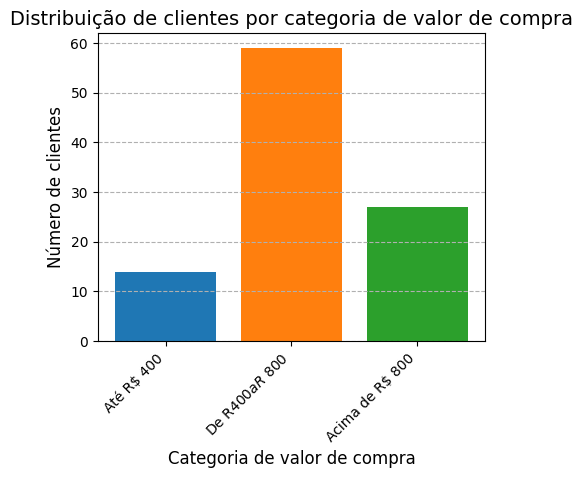

In [316]:
count_categoria = top_100_clientes['Categoria'].value_counts().sort_index()
plt.figure(figsize=(5, 4))
plt.bar(count_categoria.index, count_categoria.values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Distribuição de clientes por categoria de valor de compra', fontsize=14)
plt.xlabel('Categoria de valor de compra', fontsize=12)
plt.ylabel('Número de clientes', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.show()


## Nessa etapa calculei a frêquencia de compra desses clientes para ter uma melhor ideia dos dados e ver o perfil de compra dos clientes

In [219]:
frequencia_clientes = top_100_clientes['ID_Cliente'].value_counts()

In [317]:
print(frequencia_clientes)

1.598429e+10    8
1.574424e+10    7
1.486010e+10    7
1.560540e+10    6
1.556073e+10    5
1.598496e+10    5
1.598583e+10    5
1.503555e+10    5
1.226840e+10    5
1.327263e+10    4
1.598488e+10    4
1.598475e+10    4
1.598450e+10    4
1.598600e+10    4
1.598482e+10    4
1.598438e+10    4
1.508553e+10    4
1.248850e+10    3
1.598368e+10    3
1.598072e+10    2
1.598494e+10    2
1.581283e+10    2
1.597850e+10    1
1.598116e+10    1
1.597749e+10    1
Name: ID_Cliente, dtype: int64


## Nessa etapa puxei o histórico de compras desses 100 clientes que o modelo previu para ter uma melhor fundamentação na análise dos dados

In [307]:
historico_top_100 = {k: v for k, v in historico_compras.items() if k in top_100_ids}

for cliente_id, historico in historico_top_100.items():
    print(f"Histórico de compras do cliente {cliente_id}:")
    for compra in historico:
        print(compra)
    print()  # linha em branco para separar os históricos


<ipython-input-307-8e4e88ea93a2>:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  historico_top_100 = {k: v for k, v in historico_compras.items() if k in top_100_ids}
